# Read KRF files
Kick off 2025-10-31

## Initial settings

In [ ]:
# Import essential libraries
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
# import shapely
# import rasterio.mask

# Set path
path_checkpoint = Path('checkpoint')
dir_assets = '/Users/hkang/damask/gis/assets'

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

## Read KRF files from source (ok to skip)

In [ ]:
dir_krf = Path(dir_assets, 'KRF-v3')

path_node = Path(dir_krf, 'KRF_ver3_NODE.shp')
path_line = Path(dir_krf, 'KRF_ver3_LINE.shp')
path_poly = Path(dir_krf, 'KRF_ver3_CATCHMENt.shp')

In [ ]:
# Nodes from KRF
gdf_node = gpd.read_file(path_node)
# gdf_node.head(3)

In [ ]:
# Streams from KRF
gdf_line = gpd.read_file(path_line)
# gdf_line.head(3)

In [ ]:
# Catchments from KRF
gdf_poly = gpd.read_file(path_poly)
# gdf_poly.head(3)

In [ ]:
if not path_checkpoint.exists():
    path_checkpoint.mkdir()
    print(f'{path_checkpoint.resolve()} created')

    gdf_node.to_file(Path(path_checkpoint, 'krf_node.gpkg'), driver='GPKG')
    gdf_line.to_file(Path(path_checkpoint, 'krf_line.gpkg'), driver='GPKG')
    # split file fitted for github repo 
    idh = len(gdf_poly) // 2
    gdf_poly.iloc[:idh].to_file(Path(path_checkpoint, 'krf_catchment_1.gpkg'), driver='GPKG')
    gdf_poly.iloc[idh:].to_file(Path(path_checkpoint, 'krf_catchment_2.gpkg'), driver='GPKG')

    continue_from_here = False

else:
    print(f'{path_checkpoint.resolve()} already exists')

/Users/hkang/dev/pj-stations/checkpoint already exists


## Plot KRF on a map (checkpoint)

In [ ]:
# set True when it is continued from here
continue_from_here = True

if continue_from_here:
    gdf_node = gpd.read_file(Path(path_checkpoint, 'krf_node.gpkg'))
    gdf_line = gpd.read_file(Path(path_checkpoint, 'krf_line.gpkg'))

    gdf_poly1 = gpd.read_file(Path(path_checkpoint, 'krf_catchment_1.gpkg'))
    gdf_poly2 = gpd.read_file(Path(path_checkpoint, 'krf_catchment_2.gpkg'))
    gdf_poly = pd.concat([gdf_poly1, gdf_poly2])

    print("node, line, poly files are successfully loaded")

node, line, poly files are successfully loaded


In [ ]:
dir_hydroSHED_conDEM = Path(dir_assets, 'HydroSHED-conDEM')
path_conDEM = Path(dir_hydroSHED_conDEM, 'n30e120_con.tif')

src_conDEM = rasterio.open(path_conDEM)

b = src_conDEM.bounds
extent = [b.left, b.right, b.bottom, b.top]

arr_conDEM = src_conDEM.read()
arr_conDEM = np.squeeze(arr_conDEM)

# src_conDEM.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': 32767.0,
 'width': 12000,
 'height': 12000,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333333333334, 0.0, 120.0,
        0.0, -0.0008333333333333327, 40.0)}

In [ ]:
dir_ne = Path(dir_assets, 'natureEarth')
path_ne = Path(dir_ne, 'natural_earth_vector.gpkg')

gpd.list_layers(path_ne).tail(n=3)

,name,geometry_type
180,ne_110m_land,Polygon
181,ne_110m_ocean,Polygon
182,ne_110m_rivers_lake_centerlines,LineString


In [ ]:
gdf_ne = gpd.read_file('/Users/hkang/damask/gis/assets/natureEarth/natural_earth_vector.gpkg', layer='ne_110m_admin_0_countries')
# gdf_ne[gdf_ne['NAME_LONG'].str.contains('Korea')]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
95,Admin-0 country,1,3,North Korea,PRK,0,2,Sovereign country,1,North Korea,PRK,0,North Korea,PRK,0,North Korea,PRK,0,North Korea,Dem. Rep. Korea,PRK,Dem. Rep. Korea,None,N.K.,KP,Democratic People's Republic of Korea,None,"Korea, North",None,None,"Korea, Dem. Rep.",None,3,5,3,9,25666161.000,15,2019,40000,2016,7. Least developed region,5. Low income,KN,KP,KP,PRK,PRK,408,408,408,KP,PRK,23424865,23424865,Exact WOE match as country,PRK,None,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,11,15,4,-99,1,0.000,3.000,8.000,126.445,39.885,1159321181,Q423,كوريا الشمالية,উত্তর কোরিয়া,Nordkorea,North Korea,Corea del Norte,کره شمالی,Corée du Nord,Βόρεια Κορέα,קוריאה הצפונית,उत्तर कोरिया,Észak-Korea,Korea Utara,Corea del Nord,朝鮮民主主義人民共和国,조선민주주의인민공화국,Noord-Korea,Korea Północna,Coreia do Norte,КНДР,Nordkorea,Kuzey Kore,Корейська Народно-Демократична Республіка,شمالی کوریا,Cộng hòa Dân chủ Nhân dân Triều Tiên,朝鲜民主主义人民共和国,朝鮮民主主義人民共和國,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((130.78 42.22001, 130.78 42.220..."
96,Admin-0 country,1,2,South Korea,KOR,0,2,Sovereign country,1,South Korea,KOR,0,South Korea,KOR,0,South Korea,KOR,0,South Korea,Republic of Korea,KOR,Republic of Korea,None,S.K.,KR,Republic of Korea,None,"Korea, South",None,None,"Korea, Rep.",None,4,1,1,5,51709098.000,16,2019,1646739,2019,4. Emerging region: MIKT,1. High income: OECD,KS,KR,KR,KOR,KOR,410,410,410,KR,KOR,23424868,23424868,Exact WOE match as country,KOR,None,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,KOR,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,11,17,4,-99,1,0.000,2.500,7.000,128.130,36.385,1159320985,Q884,كوريا الجنوبية,দক্ষিণ কোরিয়া,Südkorea,South Korea,Corea del Sur,کره جنوبی,Corée du Sud,Νότια Κορέα,קוריאה הדרומית,दक्षिण कोरिया,Dél-Korea,Korea Selatan,Corea del Sud,大韓民国,대한민국,Zuid-Korea,Korea Południowa,Coreia do Sul,Республика Корея,Sydkorea,Güney Kore,Південна Корея,جنوبی کوریا,Hàn Quốc,大韩民国,大韓民國,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No

In [ ]:
boundary = gdf_ne[gdf_ne['NAME_LONG']=='Republic of Korea']
boundary_buffer = boundary.to_crs(epsg=5186).geometry.buffer(25*1000)
boundary_buffer = boundary_buffer.to_crs(epsg=4326)

# uncomment to view buffered boundary
# boundary_buffer.explore()

In [ ]:
bbox = boundary_buffer.total_bounds  # returns (minx, miny, maxx, maxy)
window = rasterio.windows.from_bounds(*bbox, src_conDEM.transform)

cropped_dem = src_conDEM.read(1, window=window)
print(f"Original data shape: {src_conDEM.shape}")
print(f"Cropped data shape: {cropped_dem.shape}")

cropped_transform = src_conDEM.window_transform(window)
print(f"Original transform:\n {src_conDEM.transform}")
print(f"Cropped transform:\n {cropped_transform}")

Original data shape: (12000, 12000)
Cropped data shape: (5607, 4687)
Original transform:
 | 0.00, 0.00, 120.00|
| 0.00,-0.00, 40.00|
| 0.00, 0.00, 1.00|
Cropped transform:
 | 0.00, 0.00, 125.84|
| 0.00,-0.00, 38.84|
| 0.00, 0.00, 1.00|


In [157]:
cropped_dem

array([[   44,    46,    48, ..., 32767, 32767, 32767],
       [   42,    45,    47, ..., 32767, 32767, 32767],
       [   38,    42,    44, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]],
      shape=(5607, 4687), dtype=int16)

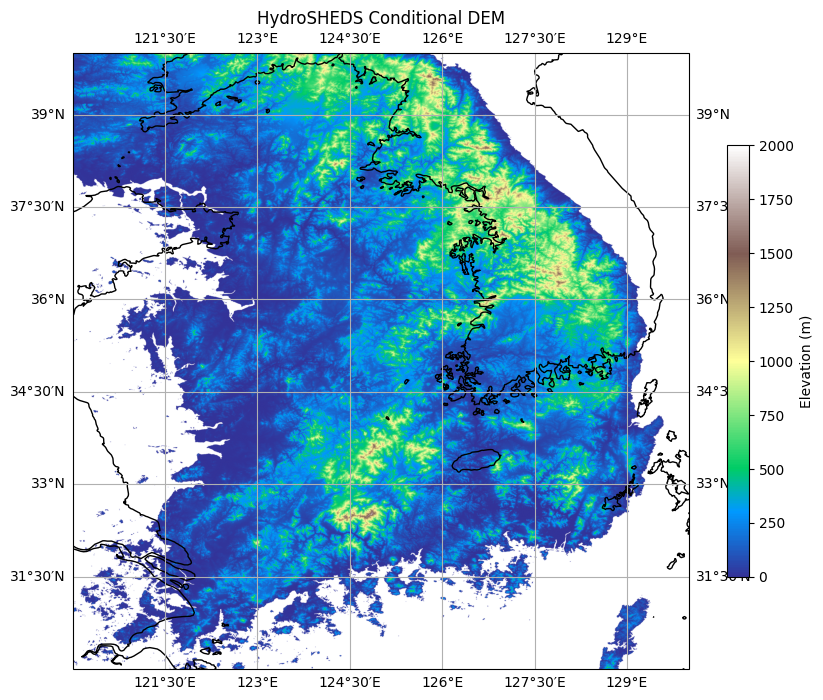

In [161]:
fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.imshow(cropped_dem, origin='upper', extent=extent, transform=ccrs.PlateCarree(), cmap='terrain', vmin=0, vmax=2000)

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label('Elevation (m)')

ax.set_title('HydroSHEDS Conditional DEM')

plt.show()